In [16]:
import pandas as pd
import numpy as np
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'practice_data.csv')
data.head(10)

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy_of_Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [7]:
# feature label Encoding 
# Encode binary string columns like 'Yes'/'No'

for col in data.select_dtypes(include='object').columns:
    if data[col].nunique() == 2:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    else:
        data = pd.get_dummies(data, columns=[col])

In [9]:
data.head(30)

,EmployeeID,gender,Days Present,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,department_Engineering,department_Finance,department_Human Resources,department_Marketing,department_Sales,Accuracy_of_Work_High,Accuracy_of_Work_Low,Accuracy_of_Work_Medium
0,1,1,20,1,85,8,7,51638,0,0,0,0,0,1,1,0,0
1,2,0,22,1,90,7,6,97797,1,0,0,0,1,0,0,0,1
2,3,1,25,0,80,9,8,95341,0,0,0,1,0,0,1,0,0
3,4,1,19,1,75,6,5,91806,0,1,0,0,0,0,0,1,0
4,5,0,23,1,85,7,7,64247,1,0,1,0,0,0,0,0,1
5,6,1,21,1,95,8,8,89988,0,0,0,0,0,1,1,0,0
6,7,0,24,0,70,5,4,70934,1,0,0,0,1,0,0,1,0
7,8,1,18,1,80,6,6,96578,0,0,0,1,0,0,0,0,1
8,9,1,20,1,90,8,7,74219,0,1,0,0,0,0,1,0,0
9,10,0,22,1,85,7,6,87009,1,0,1,0,0,0,0,0,1


In [11]:
x = data.drop(['gender','Meeting Project Deadlines','churned'],axis=1)
y = data['churned']
x.head(5)

,EmployeeID,Days Present,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,department_Engineering,department_Finance,department_Human Resources,department_Marketing,department_Sales,Accuracy_of_Work_High,Accuracy_of_Work_Low,Accuracy_of_Work_Medium
0,1,20,85,8,7,51638,0,0,0,0,1,1,0,0
1,2,22,90,7,6,97797,0,0,0,1,0,0,0,1
2,3,25,80,9,8,95341,0,0,1,0,0,1,0,0
3,4,19,75,6,5,91806,1,0,0,0,0,0,1,0
4,5,23,85,7,7,64247,0,1,0,0,0,0,0,1


In [12]:
# Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic regression


Logistic regression is a statistical method used for predicting the probability of a binary outcome (i.e., an outcome with two possible values, like Yes/No, 1/0, or True/False) based on one or more independent variables.

In Simple Terms:
Logistic regression helps answer questions like:

Will a customer buy a product or not?

Is an email spam or not?

Will a patient be diagnosed with a disease or not?

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.42857142857142855


It means that logistic regression model correctly predicted about 42.86% of the test data.

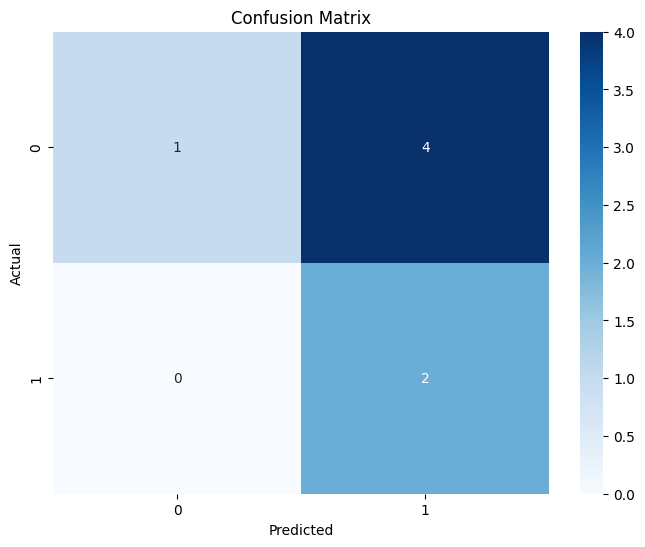

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred) # Creates a confusion matrix that shows how many true labels were correctly or incorrectly predicted.


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This Means:
1 case was correctly predicted as class 0.

2 cases were correctly predicted as class 1.

4 cases were wrongly predicted as class 1 (they were actually 0).

0 cases were wrongly predicted as class 0 (no false negatives).

TN = 1
FP = 4
FN = 0
TP = 2
total = TN + FP + FN + TP  # = 7

Accuracy = (TP + TN) / Total
= (2 + 1) / 7 ≈ 0.4286

Precision (for class 1) = TP / (TP + FP)
= 2 / (2 + 4) = 0.333

Recall (for class 1) = TP / (TP + FN)
= 2 / (2 + 0) = 1.0

F1 Score = 2 × (Precision × Recall) / (Precision + Recall)
= 2 × (0.333 × 1.0) / (0.333 + 1.0) ≈ 0.5

Interpretation:
The model is good at catching all the class 1 cases (recall = 1.0), but it also predicts class 1 too often, even when it shouldn't (low precision = 0.33).

This leads to many false positives, lowering overall accuracy.



# Decision Tree Classifier

A Decision Tree Classifier is a type of supervised machine learning algorithm used for classification (and sometimes regression). It makes decisions based on a series of questions about the features of your data — just like how you'd make decisions using a flowchart

In [18]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


That means your Decision Tree model predicted every test sample correctly — 100% accuracy.

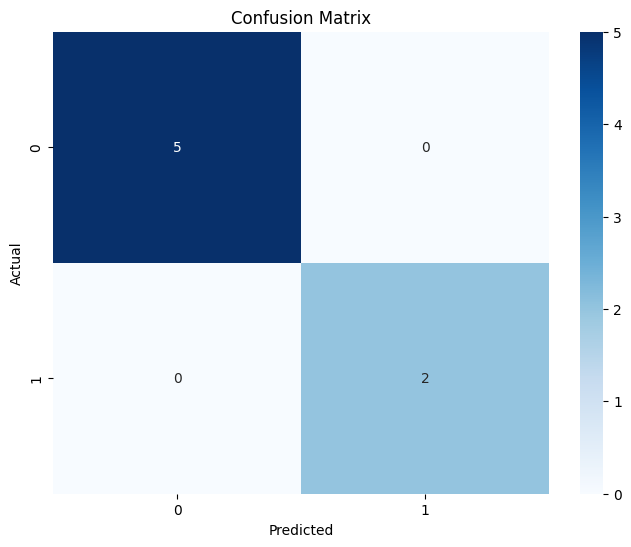

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This confusion matrix confirms that The Decision Tree Classifier made perfect predictions!

5 actual class 0 were predicted correctly.

2 actual class 1 were predicted correctly.

No mistakes were made — 0 false positives, 0 false negatives.

Metrics:
Accuracy = (5 + 2) / 7 = 1.0

Precision (for class 1) = 2 / (2 + 0) = 1.0

Recall (for class 1) = 2 / (2 + 0) = 1.0

F1 Score = 1.0



# Random Forest Classifier

A Random Forest Classifier is an advanced machine learning model that combines many Decision Trees to make more robust, accurate, and stable predictions.

It belongs to a family of models called ensemble methods, where multiple models (trees) are used together to make a final decision.

Forest: It builds many Decision Trees (not just one).

Random: It adds randomness in two ways:

Random Subsets of Data (Bootstrapping) – each tree is trained on a random part of the dataset.

Random Subsets of Features – each tree only looks at a random selection of features.

In [20]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


This model predicted all test samples correctly — perfect accuracy.

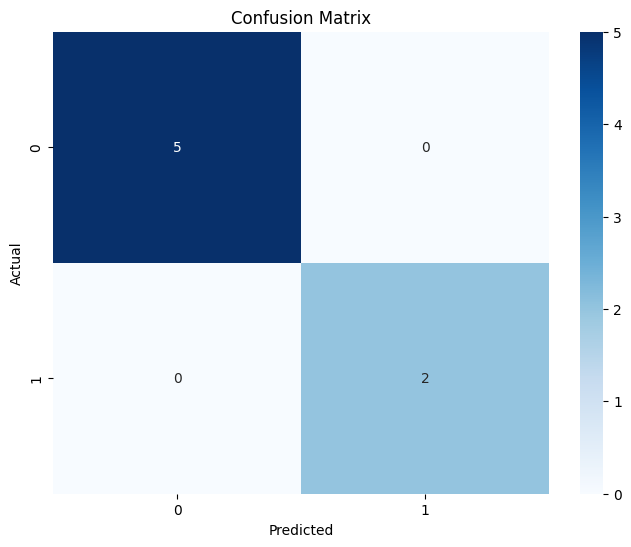

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This confusion matrix confirms that The Random Forest Classifier made perfect predictions!


5 samples of class 0 were correctly classified as 0.

2 samples of class 1 were correctly classified as 1.

No misclassifications.


Accuracy: (5 + 2) / 7 = 1.0 (100%)

Precision, Recall, F1-score (for both classes): also 1.0